In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import LinearSVC
import joblib

In [2]:
fake=pd.read_csv(r"C:\Users\masthan\OneDrive\SKAFRIN\OneDrive\Python_Projects\Python_Projects\Fake.csv")
true=pd.read_csv(r"C:\Users\masthan\OneDrive\SKAFRIN\OneDrive\Python_Projects\Python_Projects\True.csv")

In [3]:
fake['label']=0
true['label']=1

d=pd.concat([fake,true],axis=0)

d=d.sample(frac=1).reset_index(drop=True)

d.head()


,title,text,subject,date,label
0,Indonesia's bid to root out Islamists throws s...,"NUSA DUA, Indonesia, (Reuters) - When students...",worldnews,"November 7, 2017",1
1,Kremlin says U.S. idea to cut all ties with N....,MOSCOW (Reuters) - The Kremlin said on Thursda...,worldnews,"November 30, 2017",1
2,"Look Out, Big Oil: ‘Job Creation’ No Longer A...",While jobs in the solar energy sector account ...,News,"May 3, 2016",0
3,Trump taps former NASA head Griffin for deputy...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"October 28, 2017",1
4,JOE BIDEN’S SON BEAU DIES AT AGE 46,Beau Biden son of Vice President Joe Biden ...,Government News,"May 31, 2015",0


In [4]:
d["label"].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

In [5]:
df=d[['title','label']]

df.dropna(inplace=True)


C:\Users\masthan\AppData\Local\Temp\ipykernel_15308\1752280006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [6]:
df.shape

(44898, 2)

In [7]:
df.head()

,title,label
0,Indonesia's bid to root out Islamists throws s...,1
1,Kremlin says U.S. idea to cut all ties with N....,1
2,"Look Out, Big Oil: ‘Job Creation’ No Longer A...",0
3,Trump taps former NASA head Griffin for deputy...,1
4,JOE BIDEN’S SON BEAU DIES AT AGE 46,0


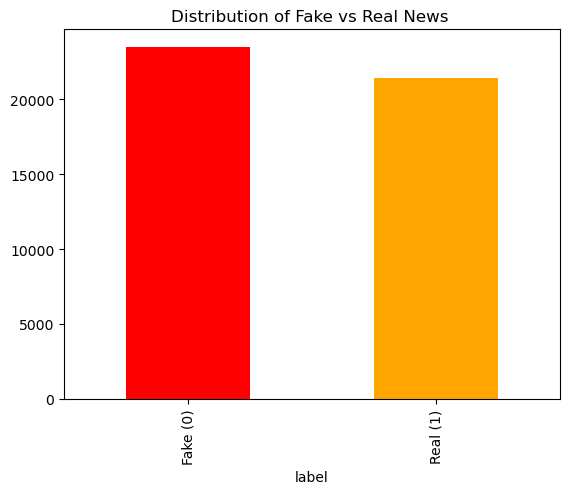

In [8]:
df['label'].value_counts().plot(kind='bar',color=['red','orange'])
plt.xticks([0,1],['Fake (0)','Real (1)'])
plt.title("Distribution of Fake vs Real News ")
plt.show()


In [9]:
X=df['title']
y=df['label']


In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7)

X_train_tfidf=vectorizer.fit_transform(X_train)
X_test_tfidf=vectorizer.transform(X_test)

In [11]:
print("Training data shape: ", X_train_tfidf.shape)

Training data shape:  (35918, 19266)


In [12]:
print("Test data shape:", X_test_tfidf.shape)

Test data shape: (8980, 19266)


In [13]:
model=LogisticRegression(max_iter=1000)


In [14]:
model.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [15]:
y_pred=model.predict(X_test_tfidf)

In [16]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9414253897550111


In [17]:
print("\nClassification Report:\n",classification_report(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      4677
           1       0.93      0.94      0.94      4303

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [18]:
svm_model=LinearSVC()

In [19]:
svm_model.fit(X_train_tfidf,y_train)

LinearSVC()

In [20]:
y_pred_svm=svm_model.predict(X_test_tfidf)

In [21]:
print("SVM Accuracy:",accuracy_score(y_test,y_pred_svm))

SVM Accuracy: 0.9501113585746103


In [22]:
print("\nSVM Classification Report:\n",classification_report(y_test,y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      4677
           1       0.95      0.95      0.95      4303

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



In [23]:
joblib.dump(svm_model,"fake_news_model.pkl")  #to save svm_model

['fake_news_model.pkl']

In [24]:
joblib.dump(vectorizer,"tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']